In [534]:
%%capture
!pip install numpy scikit-learn pandas matplotlib

In [535]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [536]:
X, y = load_iris(return_X_y=True)
X_std = StandardScaler().fit_transform(X)

In [537]:
X_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [557]:
pd.DataFrame(X_std).corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


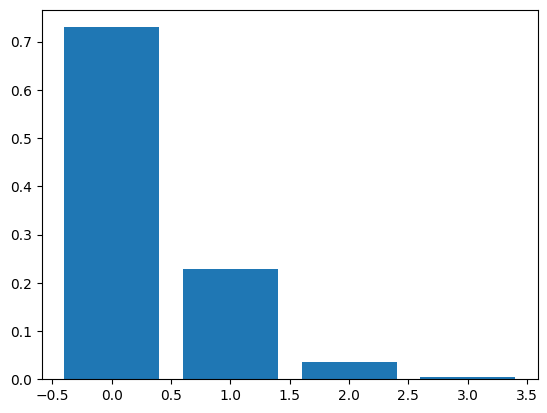

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [558]:
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(X_std)
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()
pca.explained_variance_ratio_

In [540]:
pca = sklearn.decomposition.PCA(n_components=3)
new_x = pca.fit_transform(X_std)
new_x[:5]

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ]])

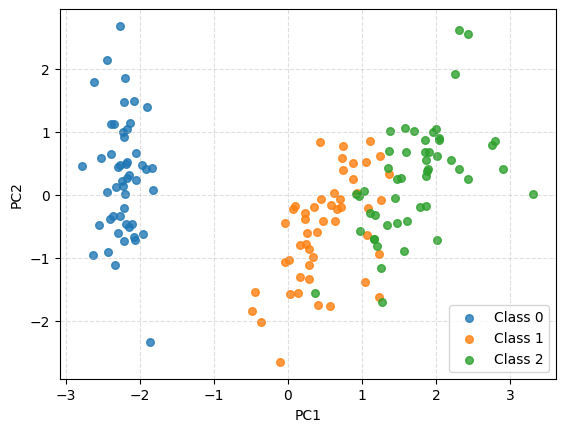

In [541]:
classes = np.unique(y)

plt.figure()
for c in classes:
    idx = y == c
    plt.scatter(new_x[idx, 0], new_x[idx, 1], s=30, alpha=0.8, label=f"Class {c}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

In [542]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, random_state=0, shuffle=True, test_size=0.25)

In [543]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [544]:
y_pred = knn.predict(X_test)

In [545]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [555]:
score = 0
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(new_x, y, shuffle=True, test_size=0.25)
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    score += knn.score(X_test, y_test)
score /= 100
print("Test set score: {:.2f}".format(score))

Test set score: 0.96
